## Definição do problema:

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import pycaret
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from scipy.stats import kurtosis, skew

pd.set_option('display.max_columns',200)

## Dados

In [2]:
# Dados de treino:
df_train = pd.read_csv('train.csv')
# Dados de teste:
df_test = pd.read_csv('test.csv')

# Criando o dataframe de resposta:
answer = pd.DataFrame()

## Análise Exploratória

In [3]:
# Guardando o número da inscrição:
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [4]:
# Removendo o número de inscrição de ambos dataframes:
df_train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
df_test.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [5]:
# Número de linhas e colunas:
df_train.shape, df_test.shape

((13730, 166), (4576, 46))

In [6]:
# Verificando o shape dos conjuntos de dados podemos observar que temos mais colunas no dados de treino no que nos dados de teste, então usaremos somente as features que existe no dataframe de test para analisarmos e determinar quais as features devemos utilizar para fazer a predição.

cols = list(df_test)
cols.append('NU_NOTA_MT')

train = df_train[cols]
test = df_test

In [7]:
# Visualizando os dados de treino:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [8]:
# Visualizando os dados de teste:
test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [9]:
# Número de linhas e colunas:
train.shape, test.shape

((13730, 47), (4576, 46))

In [10]:
def info_data(df):
    '''Summary of some dataframe information.'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'percentage': (df.isna().sum() / df.shape[0]) * 100,
                       'unique': df.nunique()})
    return df

In [11]:
# Dados de treino:
info_data(train)

,type,amount,percentage,unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,55
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,4
TP_ENSINO,float64,9448,68.812819,3


In [12]:
# Dados de teste:
info_data(test)

,type,amount,percentage,unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,46
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,3
TP_ENSINO,float64,3096,67.657343,3


## Análise detalhada da variável alvo "NU_NOTA_MT"

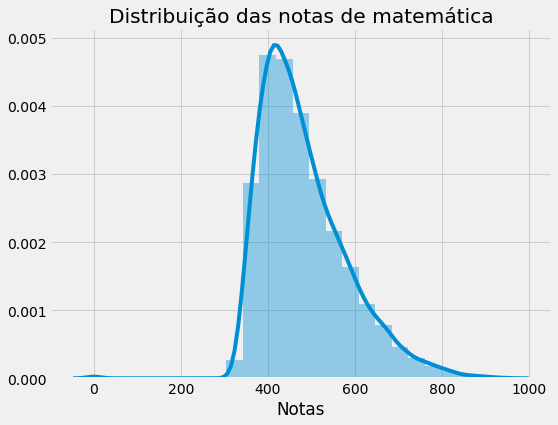

In [13]:
# verificando a distribuição da variável:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train.NU_NOTA_MT, bins=25)
plt.xlabel('Notas')
plt.title('Distribuição das notas de matemática');

In [14]:
# Estatística descritiva da variável alvo:
train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [15]:
# Analisando mais algumas medidas estatísticas:
print(f'Curtose: {train.NU_NOTA_MT.kurt()}')
print(f'Assimetria: {train.NU_NOTA_MT.skew()}')

Curtose: 1.4225025820577502
Assimetria: 0.9206896733932955


- A **Curtose** é uma das medidas para identificar se temos outliers na distribuição. O valor da curtose é menor que 3 isso basicamente significa que as caudas da nossa distribuição tendem a ser mais leves que a de uma distribuição normal ou a falta de valores discrepantes.   

- Nossa **Assimetria** é positiva, ou seja, temos uma cauda mais longa no lado direito da distribuição. Os dados são moderadamente inclinados pois nosso valor de assimetria está entre 0,5 e 1.

## Limpeza e transformação dos dados:

In [16]:
def cleaning_data(df):
    '''Removing features that are irrelevant to the model.'''

    df.drop(['TP_DEPENDENCIA_ADM_ESC',
             'TP_ENSINO',
             'Q027',
             'CO_PROVA_CN',
             'CO_PROVA_CH',
             'CO_PROVA_LC',
             'CO_PROVA_MT',
             'SG_UF_RESIDENCIA',
             'CO_UF_RESIDENCIA',
             'TP_NACIONALIDADE',
             'IN_BAIXA_VISAO',
             'IN_CEGUEIRA',
             'IN_SURDEZ',
             'IN_DISLEXIA',
             'IN_DISCALCULIA',
             'IN_SABATISTA',
             'IN_GESTANTE',
             'IN_IDOSO',
             'TP_ANO_CONCLUIU',
             'TP_LINGUA',
             'IN_TREINEIRO',
             'TP_ST_CONCLUSAO',
             'TP_STATUS_REDACAO',
             'NU_IDADE'], axis=1, inplace=True)
    return df


In [17]:
#Aplicando a limpeza nos dados:
cleaning_data(train)
cleaning_data(test)
train.shape, test.shape

((13730, 23), (4576, 22))

- As 3 primeiras colunas foram descartadas porque possuem mais de 50% de dados missing, depois de uma análise no [dicionário de dados](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip) decidi eliminar as outras colunas por entender que elas não vão contribuir para uma boa performance do modelo.

In [18]:
def imput_data(df):
    '''Imputing values ​​to the missing data.'''

    df.fillna(df.dtypes.replace({'float64': 0}), inplace=True)
    return df

In [19]:
imput_data(train)
train.head()

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,M,1,1,1,1,1,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4
1,F,3,2,1,1,1,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8
2,F,3,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,A,0.0
3,F,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,D,0.0
4,M,2,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,A,0.0


In [20]:
imput_data(test)
test.head()

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,F,3,1,1,1,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,A
1,F,3,1,1,1,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,A
2,M,1,2,1,1,1,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,A
3,F,3,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,A
4,M,1,2,1,1,1,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,A


## Breve introdução sobre o **Pycaret**:

Para testar o desempenho de vários modelos optei por usar a biblioteca pycaret que agiliza e facilita todo o processo de machine learning desde o pipeline até a implementação do modelo.
Todas as informações descritas daqui em diante foram baseadas na [documentação](https://pycaret.org/guide/).

## **1-**Explicação dos parâmetros que serão setados a seguir:

- **data:** Dados de treino.

- **target:** Variável alvo.

- **remove_multicollinearity:** Remover as variáveis que são altamente correlacionadas entre si. Nesse caso o recurso menos correlacionado com a variável target é descartado.

- **multicollinearity_threshold:** Limite usado para eliminar os recursos correlatos. Seu valor padrão é de 0,9.

- **normalize:** Faz a normalização dos dados, por padrão ele usa o 'zscore'. A opção de normalizar os dados se deve ao fato de que os algoritmos lineares têm melhor desempenho com os dados normalizados. 

- **transform_target:** É usada para alterar a forma da distribuição da variável alvo. Essa transformação deve ser aplicada quando estamos trabalhando com modelos lineares, pois eles esperaram que os dados estejam normalmente distribuídos.

- **session_id:** Equivalente ao seed do sklearn que garante a reprodutibilidade do experimento.

In [21]:
pipeline = setup(data=train, target='NU_NOTA_MT', remove_multicollinearity=True, multicollinearity_threshold=0.95, normalize=True, transform_target=True, session_id=1991)


Setup Succesfully Completed!


,Description,Value
0,session_id,1991
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(13730, 23)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


- O **setup** inicializa o ambiente pycaret e os parâmetros são usados para criar todo o pipeline de transformação dos dados. Outro detalhe é que ele infere automaticamente os tipos de dados, mas para garantir que eles sejam identificados corretamente podemos usar os parâmetros numeric_features e categorical_features.

- O **Sample Data** mostra o número de linhas e colunas do nosso conjunto de dados (contando com a variável target), observe que no **Transformed Train Set** e no **Transformed Test Set** o número de colunas aumentou por conta da transformação das variáveis categóricas.

## **2-**Após a conclusão das configurações do setup é hora de avaliar o desempenho dos modelos:

In [22]:
compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,44.655800,4459.375400,66.748800,0.915100,0.237400,0.124000
1,Gradient Boosting Regressor,44.768200,4474.135600,66.860900,0.914800,0.239600,0.124300
2,CatBoost Regressor,44.892100,4492.505500,66.992100,0.914500,0.257400,0.124500
3,Light Gradient Boosting Machine,45.659900,4764.462600,68.994400,0.909300,0.262000,0.126200
4,Random Forest,46.402500,4851.749900,69.634100,0.907700,0.229700,0.129200
5,Bayesian Ridge,47.675300,4925.223400,70.157900,0.906300,0.481900,0.131200
6,Ridge Regression,47.673800,4921.383000,70.130500,0.906300,0.487200,0.131100
7,Least Angle Regression,47.678200,4926.576900,70.167500,0.906200,0.480600,0.131200
8,Extra Trees Regressor,47.544500,5080.979900,71.264400,0.903300,0.220400,0.132800
9,Support Vector Machine,47.831000,5090.821000,71.326600,0.903100,0.487600,0.131600


- Essa função treina todos os modelos e os classifica usando a validação cruzada k-fold(10 por padrão, usei 5 para reduzir o tempo de treinamento), e retorna as pontuações das principais métricas usadas para avaliar os modelos de regressão.

- Para fins de comparação vamos usar o RMSE (**mean_squared_error**), quanto menor for esse valor mais próximo o modelo está de acertar.

O modelo que teve o menor RMSE foi o **Extreme Gradient Boosting**, mas o compare_models() retorna somente uma grade de pontuações e não o modelo treinado de fato. A seguir vamos usar uma função que realmente cria o modelo.

## **3-**Instanciando o modelo Extreme Gradient Boosting:

Precisamos passar o nome do modelo de forma abreviada no formato de string conforme descrito na documentação. Para mais detalhes acesse [https://pycaret.org/create-model/].

In [23]:
model = create_model('xgboost', fold=5, round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.84,4224.51,65.00,0.92,0.21,0.12
1,44.07,4433.01,66.58,0.92,0.26,0.13
2,44.25,4514.95,67.19,0.92,0.27,0.12
3,43.80,4187.02,64.71,0.92,0.19,0.12
4,47.32,4937.39,70.27,0.90,0.25,0.13
Mean,44.66,4459.38,66.75,0.92,0.24,0.12
SD,1.34,268.93,1.99,0.01,0.03,0.00


## **4-**Tuning do modelo

Essa função ajusta automaticamente os hiperparâmetros do modelo, por padrão são feitas 10 iterações para encontrar o melhor valor para os hiperparâmetros. Aumentar o valor pode melhorar o desempenho, mas também aumentará o tempo de treinamento. 

In [24]:
tuning_model = tune_model('xgboost', fold=5)

IntProgress(value=0, description='Processing: ', max=11)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:17:01
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 3 of 5
ETC,. . . . . . . . . . . . . . . . . .,3.12 Minutes Remaining


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [25]:
# Verificando o resultado final após a validação cruzada:
predict_model(tuning_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,45.941,4642.5488,68.1363,0.9104,0.5389,0.1289


In [26]:
# Verificando os parâmetros que foram ajustados:
print(tuning_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.07, loss='huber', max_depth=20,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=7, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1991, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Temos o modelo criado e devidamente ajustado, hora de prever os valores da nossa variável de interesse.

## **5-**Prevendo as notas de matemática

A função predict_model() é usada para prever os valores nos dados de teste.

In [27]:
predictions = predict_model(tuning_model, data=test, round=2)
predictions

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,Label
0,F,3,1,1,1,1,464.8,443.5,431.8,120.0,...,40.0,420.0,B,A,C,A,A,C,A,430.35
1,F,3,1,1,1,1,391.1,491.1,548.0,120.0,...,100.0,580.0,E,B,C,B,B,B,A,446.59
2,M,1,2,1,1,1,595.9,622.7,613.6,80.0,...,80.0,320.0,E,E,D,B,B,A,A,545.17
3,F,3,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,H,E,G,B,B,A,A,2.52
4,M,1,2,1,1,1,592.9,492.6,571.4,100.0,...,0.0,320.0,D,H,H,C,B,A,A,469.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,F,1,2,1,1,1,398.3,558.2,511.6,120.0,...,40.0,500.0,E,E,D,A,B,A,A,473.06
4572,M,2,2,1,1,1,427.6,579.7,471.1,100.0,...,100.0,520.0,C,C,C,A,A,A,A,471.88
4573,M,1,1,1,1,1,639.2,643.8,604.9,160.0,...,80.0,640.0,D,F,D,B,B,A,D,637.53
4574,M,2,1,1,1,1,427.1,467.9,540.2,140.0,...,80.0,520.0,C,E,C,A,A,A,A,460.39


- Foi adicionado ao conjunto de dados uma coluna **Label** onde se encontra os valores previstos.

## **6-**Gráficos para a análise dos resultados

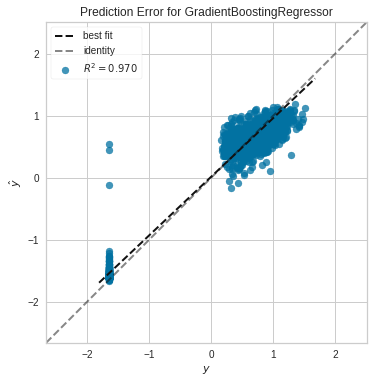

In [28]:
# Prediction Error 
plot_model(tuning_model, plot='error')

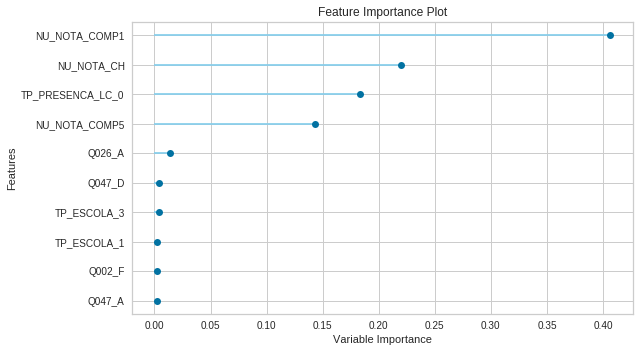

In [29]:
# Feature Importance
plot_model(tuning_model, plot='feature')

## **7-**Visualizando as predições

In [30]:
answer = pd.DataFrame({'NU_INSCRICAO':  answer['NU_INSCRICAO'],  'NU_NOTA_MT':predictions['Label'].round(2)})
answer.sample(10)

,NU_INSCRICAO,NU_NOTA_MT
1864,ab73810bdc3e819c4bcea28103c55ac80ea30c03,403.45
769,094ab89bf55fe688a34a8f6189d20b3a0e8ce9bc,465.34
4190,b92a00df35857e1e964b609040127c05ced17c99,623.27
2804,d79709571e24ee9bf8afab33d06eee7929ac0286,443.70
281,912d751c54b46c860c5ba61666fc6fc59ca2689d,401.60
821,4b1272abd1c223c6b3866738343d0d1a187bceee,504.83
1468,09985e3d85e82b3a084a6854d96f6eaaab8d8273,480.09
1628,77573ac0beae4de1eecd7e4ee31cb7ac0e517a62,449.31
3506,c65b40029e4b7c845db8e38a9aedee2303926a1e,470.83
2159,daa134e68ca7728634d98b64cb2df991c738eb93,1.02


## **8-**Salvando os resultados

In [31]:
answer.to_csv('answer.csv',index=False,header=True)